***AUTOR: ISAAC GABRIEL REYES ALBARRACÍN***

#

***Proyecto Analítica Descriptiva Exportaciones a EEUU**
#

*Analizar y tratar de predecir el rendimiento de diferentes sectores y productos de exportación ecuatorianos en el mercado de Estados Unidos, considerando para esto las variables económicas, políticas y comerciales que podrían afectar. Utilizar esto para desarrollar un modelo predictivo de Machine Learning que pueda mínimamente predecir o graficar la demanda futura de productos específicos exportados a Estados Unidos e identificar los factores clave que influyen en las exportaciones.*

La fuente de datos proporciona información histórica de las exportaciones desde Ecuador hacia Estados Unidos desde el año 2001. Contiene datos sobre los diferentes sectores y productos de exportación, así como variables económicas, políticas y comerciales relacionadas.

Fuente: https://www.datosabiertos.gob.ec/dataset/exportaciones-a-estados-unidos-de-america/resource/7ef22ada-0c7f-4eef-ad4a-e418d137e71d

In [2]:
#Importo todas las librerias necesarias para analizar el CSV, Supervisado
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Especificar la ruta completa del archivo CSV ya no es necesario con import OS
#ruta_archivo = r'C:\Users\pc\Desktop\Universidad\6 semestre\Machine Learning & Data Mining\Proyectos\Proyecto Analítica Descriptiva\Data\exportaciones_eeuu2023.csv'
# Cargar el archivo CSV en un DataFrame
#df = pd.read_csv(ruta_archivo, delimiter=',')
file_path = "../Data/exportaciones_eeuu2023.csv"  # Ruta relativa al archivo CSV desde la ubicación del notebook

df = pd.read_csv(file_path)

# Realiza operaciones con el DataFrame
# ...
# Continuar con el procesamiento de los datos...

In [4]:
# Explorar los primeros registros del DataFrame
print(df.head())

    Año  Mes    País Destino  Capítulo   4D  \
0  2001    1  ESTADOS UNIDOS         1  106   
1  2001    1  ESTADOS UNIDOS         1  106   
2  2001    1  ESTADOS UNIDOS         2  207   
3  2001    1  ESTADOS UNIDOS         2  208   
4  2001    1  ESTADOS UNIDOS         3  301   

          Producto Principal (Nivel 4)     6D       8D  \
0  Animales Vivos No Para Alimentación  10600  1060030   
1  Animales Vivos No Para Alimentación  10600  1060090   
2            Carne_ Leche Y Elaborados  20712  2071200   
3            Carne_ Leche Y Elaborados  20890  2089000   
4  Animales Vivos No Para Alimentación  30110  3011000   

  Tradicional/No tradicional No Petrolero/ Petrolero  Código Subpartida  \
0             NO TRADICIONAL            No Petrolero          106003000   
1             NO TRADICIONAL            No Petrolero          106009000   
2             NO TRADICIONAL            No Petrolero          207120000   
3             NO TRADICIONAL            No Petrolero          208900

In [5]:
df

,Año,Mes,País Destino,Capítulo,4D,Producto Principal (Nivel 4),6D,8D,Tradicional/No tradicional,No Petrolero/ Petrolero,Código Subpartida,Export FOB (miles),Toneladas
0,2001,1,ESTADOS UNIDOS,1,106,Animales Vivos No Para Alimentación,10600,1060030,NO TRADICIONAL,No Petrolero,106003000,4.50000,0.13800
1,2001,1,ESTADOS UNIDOS,1,106,Animales Vivos No Para Alimentación,10600,1060090,NO TRADICIONAL,No Petrolero,106009000,4.92300,4.98100
2,2001,1,ESTADOS UNIDOS,2,207,Carne_ Leche Y Elaborados,20712,2071200,NO TRADICIONAL,No Petrolero,207120000,79.91300,40.08900
3,2001,1,ESTADOS UNIDOS,2,208,Carne_ Leche Y Elaborados,20890,2089000,NO TRADICIONAL,No Petrolero,208900000,2.50000,0.35800
4,2001,1,ESTADOS UNIDOS,3,301,Animales Vivos No Para Alimentación,30110,3011000,NO TRADICIONAL,No Petrolero,301100000,3.53200,4.78200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121408,2023,3,ESTADOS UNIDOS,98,9806,Otras Mercancías,980600,98060000,NO TRADICIONAL,No Petrolero,9806000000,0.02094,0.00600
121409,2023,3,ESTADOS UNIDOS,98,9807,Otras Mercancías,980710,98071010,NO TRADICIONAL,No Petrolero,9807101000,0.21815,0.01822
121410,2023,3,ESTADOS UNIDOS,98,9807,Otras Mercancías,980710,98071030,NO TRADICIONAL,No Petrolero,9807103000,1.46209,0.07031
121411,2023,3,ESTADOS UNIDOS,98,9807,Otras Mercancías,980720,98072040,NO TRADICIONAL,No Petrolero,9807204000,294.12671,11.33097


In [7]:
# Verificar si hay valores nulos en el DataFrame
print(df.isnull().sum())

Año                             0
Mes                             0
País Destino                    0
Capítulo                        0
4D                              0
Producto Principal (Nivel 4)    0
6D                              0
8D                              0
Tradicional/No tradicional      0
No Petrolero/ Petrolero         0
Código Subpartida               0
Export FOB (miles)              0
Toneladas                       0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121413 entries, 0 to 121412
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Año                           121413 non-null  int64  
 1   Mes                           121413 non-null  int64  
 2   País Destino                  121413 non-null  object 
 3   Capítulo                      121413 non-null  int64  
 4   4D                            121413 non-null  int64  
 5   Producto Principal (Nivel 4)  121413 non-null  object 
 6   6D                            121413 non-null  int64  
 7   8D                            121413 non-null  int64  
 8   Tradicional/No tradicional    121413 non-null  object 
 9   No Petrolero/ Petrolero       121413 non-null  object 
 10  Código Subpartida             121413 non-null  int64  
 11  Export FOB (miles)            121413 non-null  float64
 12  Toneladas                     121413 non-nul

In [11]:
# Eliminar filas con valores nulos
df = df.dropna()

In [12]:
# Eliminar duplicados en el DataFrame
df = df.drop_duplicates()

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Año,121413.0,2.012953e+03,6.370737e+00,2001.0,2.008000e+03,2.014000e+03,2.018000e+03,2.023000e+03
Mes,121413.0,6.576849e+00,3.415733e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Capítulo,121413.0,4.619813e+01,3.228461e+01,1.0,1.500000e+01,4.400000e+01,8.300000e+01,9.800000e+01
4D,121413.0,4.631552e+03,3.234544e+03,101.0,1.511000e+03,4.418000e+03,8.302000e+03,9.808000e+03
6D,121413.0,4.631999e+05,3.234552e+05,10110.0,1.511100e+05,4.418900e+05,8.302500e+05,9.808600e+05
8D,121413.0,4.632002e+07,3.234552e+07,1011010.0,1.511100e+07,4.418909e+07,8.302500e+07,9.808600e+07
Código Subpartida,121413.0,4.632002e+09,3.234552e+09,101101000.0,1.511100e+09,4.418909e+09,8.302500e+09,9.808600e+09
Export FOB (miles),121413.0,1.177094e+03,1.885539e+04,0.0,6.650000e-01,5.800000e+00,5.192500e+01,9.544135e+05
Toneladas,121413.0,2.117077e+03,4.004755e+04,0.0,5.500000e-02,6.900000e-01,1.478500e+01,1.467933e+06


<AxesSubplot:title={'center':'Pearson'}>

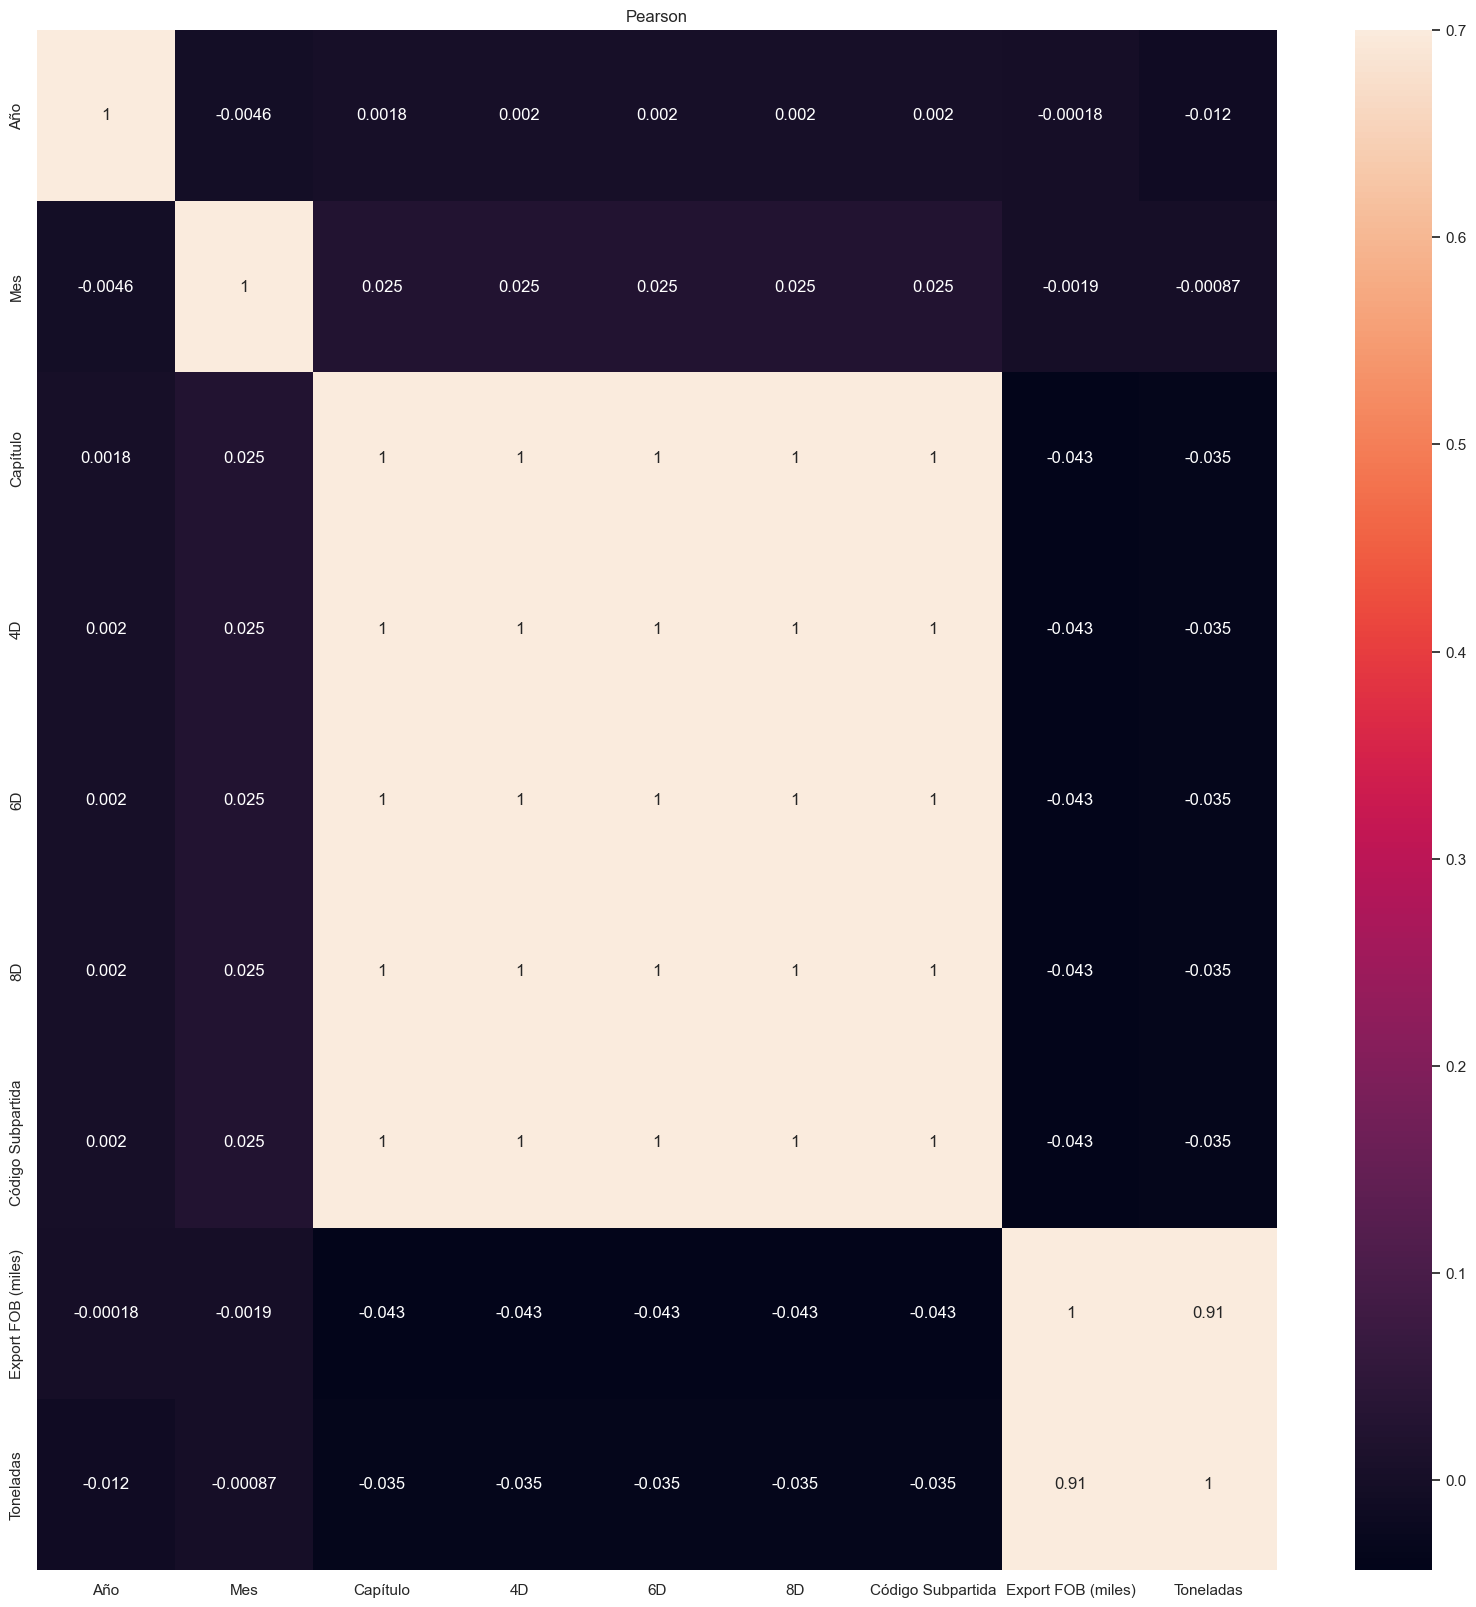

In [14]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(20, 20))
plt.title('Pearson')
sns.heatmap(df.corr(), vmax=0.7, annot=True)

array([[<AxesSubplot:title={'center':'Año'}>,
        <AxesSubplot:title={'center':'Mes'}>,
        <AxesSubplot:title={'center':'Capítulo'}>],
       [<AxesSubplot:title={'center':'4D'}>,
        <AxesSubplot:title={'center':'6D'}>,
        <AxesSubplot:title={'center':'8D'}>],
       [<AxesSubplot:title={'center':'Código Subpartida'}>,
        <AxesSubplot:title={'center':'Export FOB (miles)'}>,
        <AxesSubplot:title={'center':'Toneladas'}>]], dtype=object)

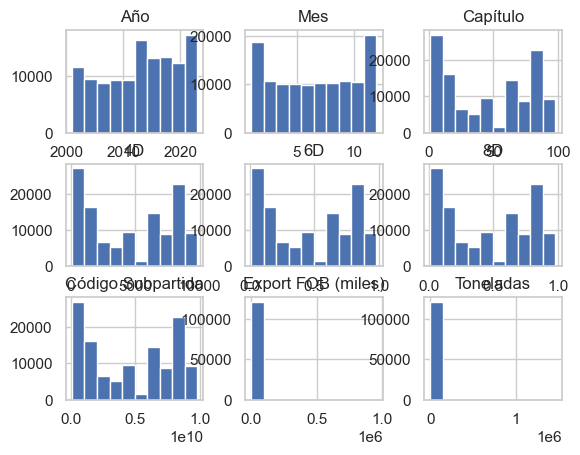

In [15]:
df.hist()

In [16]:
df['Fecha'] = df['Año'].astype(str) + '-' + df['Mes'].astype(str)


In [17]:
# Convertir una columna a tipo datetime si es necesario
df['Fecha'] = pd.to_datetime(df['Fecha'])


In [18]:
df.head()

,Año,Mes,País Destino,Capítulo,4D,Producto Principal (Nivel 4),6D,8D,Tradicional/No tradicional,No Petrolero/ Petrolero,Código Subpartida,Export FOB (miles),Toneladas,Fecha
0,2001,1,ESTADOS UNIDOS,1,106,Animales Vivos No Para Alimentación,10600,1060030,NO TRADICIONAL,No Petrolero,106003000,4.500,0.138,2001-01-01
1,2001,1,ESTADOS UNIDOS,1,106,Animales Vivos No Para Alimentación,10600,1060090,NO TRADICIONAL,No Petrolero,106009000,4.923,4.981,2001-01-01
2,2001,1,ESTADOS UNIDOS,2,207,Carne_ Leche Y Elaborados,20712,2071200,NO TRADICIONAL,No Petrolero,207120000,79.913,40.089,2001-01-01
3,2001,1,ESTADOS UNIDOS,2,208,Carne_ Leche Y Elaborados,20890,2089000,NO TRADICIONAL,No Petrolero,208900000,2.500,0.358,2001-01-01
4,2001,1,ESTADOS UNIDOS,3,301,Animales Vivos No Para Alimentación,30110,3011000,NO TRADICIONAL,No Petrolero,301100000,3.532,4.782,2001-01-01


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Año,121413.0,2.012953e+03,6.370737e+00,2001.0,2.008000e+03,2.014000e+03,2.018000e+03,2.023000e+03
Mes,121413.0,6.576849e+00,3.415733e+00,1.0,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
Capítulo,121413.0,4.619813e+01,3.228461e+01,1.0,1.500000e+01,4.400000e+01,8.300000e+01,9.800000e+01
4D,121413.0,4.631552e+03,3.234544e+03,101.0,1.511000e+03,4.418000e+03,8.302000e+03,9.808000e+03
6D,121413.0,4.631999e+05,3.234552e+05,10110.0,1.511100e+05,4.418900e+05,8.302500e+05,9.808600e+05
8D,121413.0,4.632002e+07,3.234552e+07,1011010.0,1.511100e+07,4.418909e+07,8.302500e+07,9.808600e+07
Código Subpartida,121413.0,4.632002e+09,3.234552e+09,101101000.0,1.511100e+09,4.418909e+09,8.302500e+09,9.808600e+09
Export FOB (miles),121413.0,1.177094e+03,1.885539e+04,0.0,6.650000e-01,5.800000e+00,5.192500e+01,9.544135e+05
Toneladas,121413.0,2.117077e+03,4.004755e+04,0.0,5.500000e-02,6.900000e-01,1.478500e+01,1.467933e+06


In [20]:
df=df.fillna(df.mean())

C:\Users\pc\AppData\Local\Temp\ipykernel_17288\3358723971.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean())
C:\Users\pc\AppData\Local\Temp\ipykernel_17288\3358723971.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


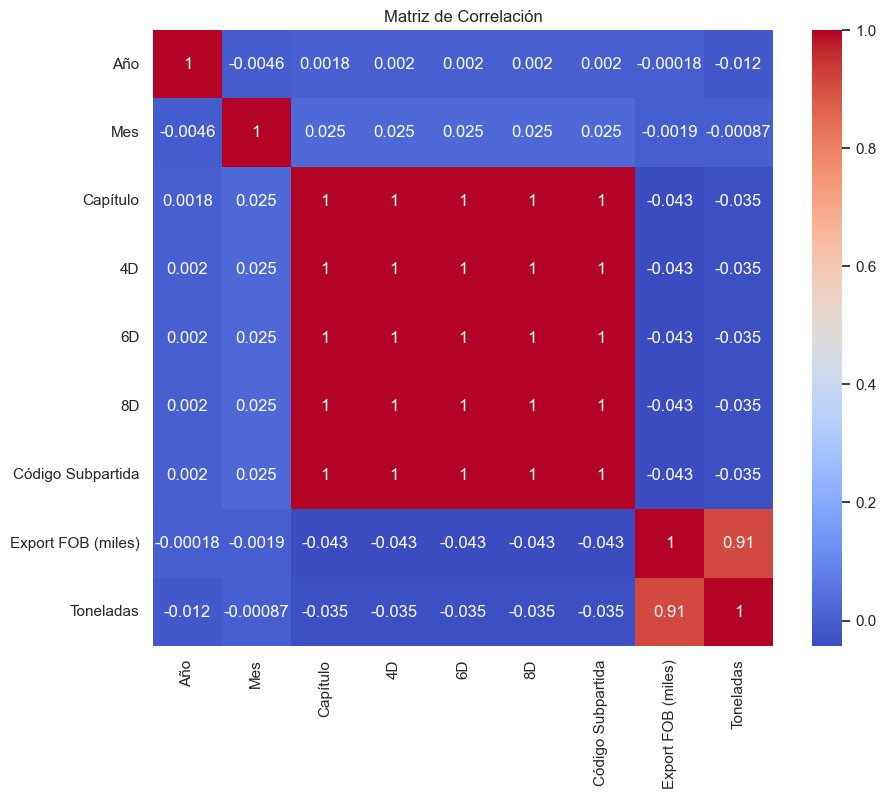

In [21]:
# Ejemplo de análisis y visualización
# Calcular y mostrar la correlación entre variables
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [40]:
X = df.drop('Export FOB (miles)', axis=1)
y = df['Export FOB (miles)']

In [30]:
#importo MinMaxScaler de Sklearn
from sklearn.preprocessing import MinMaxScaler

In [31]:
print(df['Export FOB (miles)'].dtype)

float64


In [ ]:
# Hacer una técnica de escalado de datos
scaler = MinMaxScaler()
# Encuentra los máximos y minimos de los datos
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# Ejemplo de visualización: Histograma del año de exportación
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Año', bins=10)
plt.title('Distribución de las exportaciones por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Ejemplo de visualización: Gráfico de barras del país de destino
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='País Destino')
plt.title('Número de exportaciones por país de destino')
plt.xlabel('País de destino')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

In [25]:
#Como no tenemos una columna para analizar la regresión crearemos del DataFrame una variable

#A continuación use código:
sns.histplot(df['Toneladas'])
plt.Title('Distribución de Toneladas')
plt.xlabel('Toneladas')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
sns.histplot(df['Export FOB (miles)'])
plt.Title('Distribución de Export FOB (miles')
plt.xlabel('Export FOB (miles)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
sns.scatterplot(x='Export FOB (miles)', y='Toneladas', data=df)
plt.title('Comparación de Export FOB (miles) VS. Toneladas')
plt.xlabel('Export FOB (miles)')
plt.ylabel('Toneladas')
plt.show

In [ ]:
# Ejemplo de análisis y visualización
# Graficar el total de exportaciones por año
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='año', data=df)
plt.title('Total de Exportaciones por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Exportaciones')
plt.xticks(rotation=45)
plt.show()